In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.preprocessing import StandardScaler

# geographical tools
import geopandas as gpd  # pandas dataframe-like geodataframes for geographical data
import contextily as ctx  # used for obtianing a basemap of Canada
from shapely.geometry import Point

import warnings
warnings.filterwarnings('ignore')

# Plotting function
Helper function to help plot results



In [40]:
# Write a function that plots clustered locations and overlays them on a basemap.

def plot_clustered_locations(df,  title='Museums Clustered by Proximity', colName='Cluster'):
    """
    Plots clustered locations and overlays on a basemap.
    
    Parameters:
    - df: DataFrame containing 'Latitude', 'Longitude', and 'Cluster' columns
    - title: str, title of the plot
    """
    
    # Load the coordinates intto a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs="EPSG:4326")
    
    # Reproject to Web Mercator to align with basemap 
    gdf = gdf.to_crs(epsg=3857)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Separate non-noise, or clustered points from noise, or unclustered points
    non_noise = gdf[gdf[colName] != -1]
    noise = gdf[gdf[colName] == -1]
    
    # Plot noise points 
    noise.plot(ax=ax, color='k', markersize=30, ec='r', alpha=1, label='Noise')
    
    # Plot clustered points, colured by 'Cluster' number
    non_noise.plot(ax=ax, column=colName, cmap='tab10', markersize=30, ec='k', legend=False, alpha=0.6)
    
    # Add basemap of  Canada
    ctx.add_basemap(ax, source='./Canada.tif', zoom=4),
    
    # Format plot
    plt.title(title, )
    plt.xlabel('Longitude', )
    plt.ylabel('Latitude', )
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Data

In [3]:
import requests
import zipfile
import io
import os

# URL of the ZIP file on the cloud server
zip_file_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/YcUk-ytgrPkmvZAh5bf7zA/Canada.zip'

# Directory to save the extracted TIFF file
output_dir = './'
os.makedirs(output_dir, exist_ok=True)

# Step 1: Download the ZIP file
response = requests.get(zip_file_url)
response.raise_for_status()  # Ensure the request was successful
# Step 2: Open the ZIP file in memory
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    # Step 3: Iterate over the files in the ZIP
    for file_name in zip_ref.namelist():
        if file_name.endswith('.tif'):  # Check if it's a TIFF file
            # Step 4: Extract the TIFF file
            zip_ref.extract(file_name, output_dir)
            print(f"Downloaded and extracted: {file_name}")

Downloaded and extracted: Canada.tif


In [11]:
import urllib.request
import ssl
import certifi

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/r-maSj5Yegvw2sJraT15FA/ODCAF-v1-0.csv'
ssl_context = ssl.create_default_context(cafile=certifi.where())
with urllib.request.urlopen(url, context=ssl_context) as response:
    data = pd.read_csv(response, encoding = "ISO-8859-1")
data

Index                      Facility_Name  \
0         1                   #Hashtag Gallery   
1         2  'Ksan Historical Village & Museum   
2         3               'School Days' Museum   
3         4                   10 Austin Street   
4         5              10 Gates Dancing Inc.   
...     ...                                ...   
7967   9792                      Zurich Libary   
7968   9797                Craigdarroch Castle   
7969   9798                                 ..   
7970   9799                                 ..   
7971   9800                                 ..   

                   Source_Facility_Type                   ODCAF_Facility_Type  \
0                                    ..                               gallery   
1        historic site-building or park                                museum   
2             community/regional museum                                museum   
3             built heritage properties             heritage or historic site   
4                                  arts                         miscellaneous   
...                                 ...                                   ...   
7967                            library                   library or archives   
7968              museums and galleries                                museum   
7969              museums and galleries                                museum   
7970   performance space - indoor venue  theatre/performance and concert hall   
7971  performance space - outdoor venue  theatre/performance and concert hall   

                          Provider Unit Street_No  Street_Name Postal_Code  \
0                          toronto   ..       801  dundas st w     M6J 1V2   
1     canadian museums association   ..      1500       62 hwy     V0J 1Y0   
2     canadian museums association   ..       427     queen st     E3B 5R6   
3                          moncton   ..        10    austin st     E1C 1Z6   
4                           ottawa   ..        ..           ..          ..   
...                            ...  ...       ...          ...         ...   
7967                  huron county   ..        10  goshen st n     N0M 2T0   
7968                      victoria   ..        ..           ..          ..   
7969                      victoria   ..        ..           ..          ..   
7970                      victoria   ..        ..           ..          ..   
7971                      victoria   ..        ..           ..          ..   

              City Prov_Terr  \
0          toronto        on   
1         hazelton        bc   
2      fredericton        nb   
3          moncton        nb   
4           ottawa        on   
...            ...       ...   
7967  huron county        on   
7968      victoria        bc   
7969      victoria        bc   
7970      victoria        bc   
7971      victoria        bc   

                                  Source_Format_Address     CSD_Name   CSDUID  \
0                                       801 dundas st w      Toronto  3520005   
1     1500 hwy 62 hazelton british columbia v0j 1y0 ...     Hazelton  5949022   
2     427 queen st fredericton new brunswick e3b 5r6...  Fredericton  1310032   
3                                          10 austin st      Moncton  1307022   
4                                                    ..       Ottawa  3506008   
...                                                 ...          ...      ...   
7967                 10 goshen st n, zurich, on n0m 2t0    Bluewater  3540010   
7968                                                 ..     Victoria  5917034   
7969                                                 ..     Victoria  5917034   
7970                                                 ..     Victoria  5917034   
7971                                                 ..     Victoria  5917034   

     PRUID     Latitude     Longitude  
0       35  43.65169472  -79.40803272  
1       59   55.2645508  -127.6428124  
2       13    45.

# Data Exercises

Q1. Display the facility types and their counts

In [12]:
data.ODCAF_Facility_Type.value_counts()

ODCAF_Facility_Type
library or archives                     3013
museum                                  1938
gallery                                  810
heritage or historic site                620
theatre/performance and concert hall     583
festival site                            346
miscellaneous                            343
art or cultural centre                   225
artist                                    94
Name: count, dtype: int64

Q2. Filter the data to only include museums

In [14]:
museums = data[data.ODCAF_Facility_Type == 'museum']
museums.ODCAF_Facility_Type.value_counts()

ODCAF_Facility_Type
museum    1938
Name: count, dtype: int64

Q3. Select only the Latitude and Longitude features as inputs to our clustering problem

In [18]:
X = museums[['Latitude', 'Longitude']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 1 to 7969
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Latitude   1938 non-null   object
 1   Longitude  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


Q4. We'll need these coordinates to be floats, not objects

In [20]:
X = museums[['Latitude', 'Longitude']]
X

Latitude     Longitude
1      55.2645508  -127.6428124
2       45.963283   -66.6419017
8      49.1763542   -123.112783
13      49.261938   -123.151123
15    49.88955855  -97.23574396
...           ...           ...
7940    43.857692   -79.3619396
7954           ..            ..
7958           ..            ..
7968  48.42241956  -123.3435527
7969   48.4260053  -123.3691883

[1938 rows x 2 columns]

In [ ]:
data = X[X.Latitude!='..']
# data[['Latitude','Longitude']] = data[['Latitude','Longitude']].astype('float')
data = data.astype('float')
data

Latitude   Longitude
1     55.264551 -127.642812
2     45.963283  -66.641902
8     49.176354 -123.112783
13    49.261938 -123.151123
15    49.889559  -97.235744
...         ...         ...
7934  43.183090  -79.224564
7936  43.690022  -79.476208
7940  43.857692  -79.361940
7968  48.422420 -123.343553
7969  48.426005 -123.369188

[1607 rows x 2 columns]

# Modeling (DBSCAN)

In this case we know how to scale the coordinates. Using standardization would be an error becaues we aren't using the full range of the lat/lng coordinates.

Since latitude has a range of +/- 90 degrees and longitude ranges from 0 to 360 degrees, the correct scaling is to double the longitude coordinates (or half the Latitudes)

In [28]:
coords_scaled = data.copy()
coords_scaled["Latitude"] = 2 * coords_scaled["Latitude"]

In [29]:
min_samples=3       # minimum number of samples needed to form a neighbourhood
eps=1.0             # neighbourhood search radius
metric='euclidean'  # distance measure 

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
dbscan.fit(coords_scaled)

DBSCAN(eps=1.0, min_samples=3)

In [32]:
# Add cluster labels to the DataFrame
data['Cluster'] = dbscan.fit_predict(coords_scaled)
data['Cluster'].value_counts()

Cluster
 4     701
 2     192
 1     181
 7     134
 3      94
-1      79
 6      30
 10     27
 8      21
 11     15
 15     13
 20     11
 16     10
 19      9
 27      8
 12      7
 24      6
 18      6
 28      6
 26      6
 14      6
 5       6
 22      4
 9       4
 13      4
 30      3
 31      3
 29      3
 0       3
 25      3
 23      3
 21      3
 17      3
 32      3
Name: count, dtype: int64

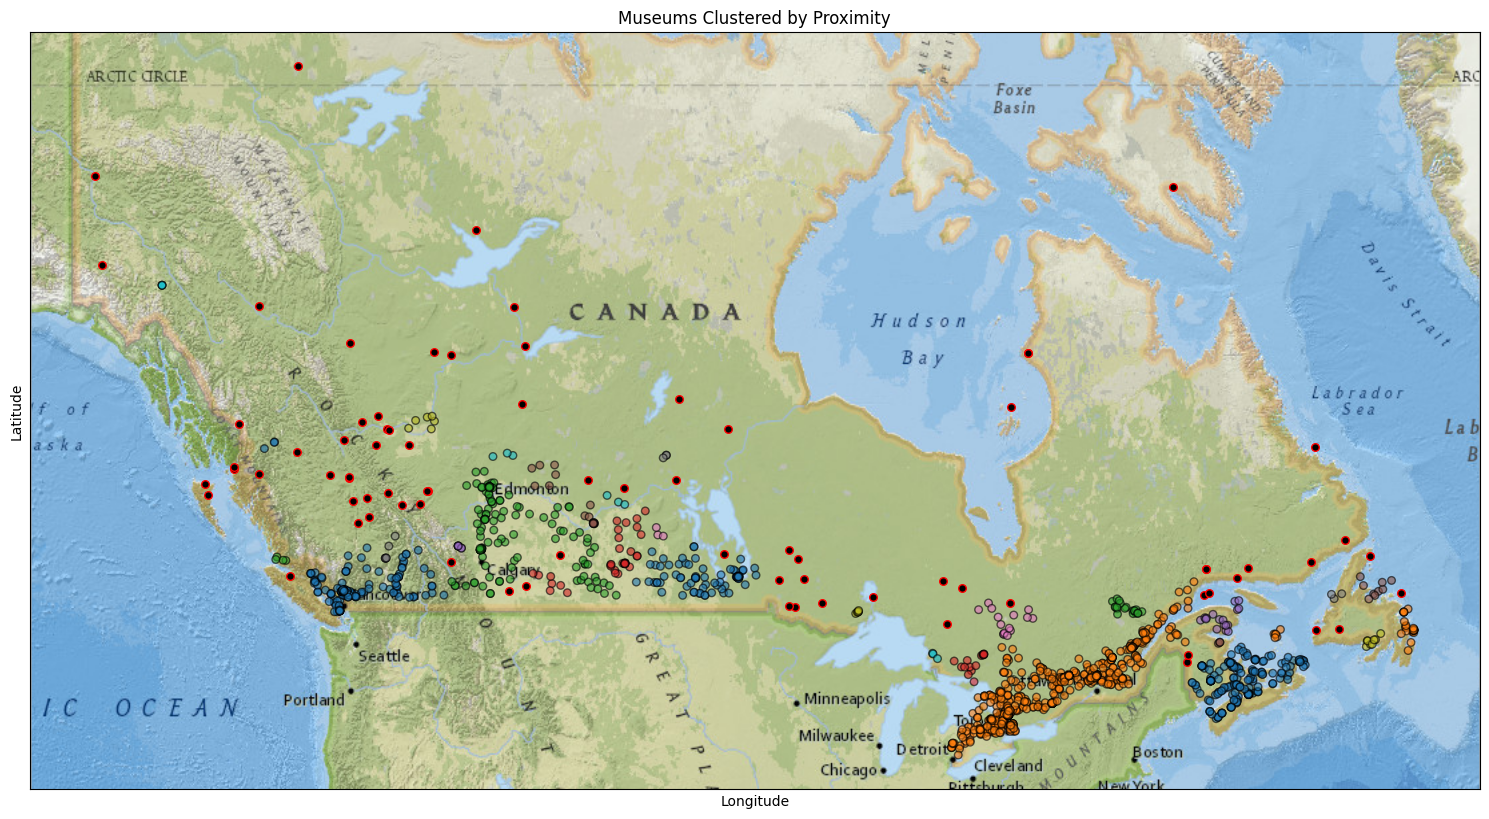

In [37]:
# Plot the museums on a basemap of Canada, colored by cluster label.
plot_clustered_locations(data, title='Museums Clustered by Proximity')

# Modeling (HDBSCAN)

In [35]:
min_samples=None
min_cluster_size=3

hdb = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, metric='euclidean')

In [36]:
data['Cluster_HDB'] = hdb.fit_predict(coords_scaled)
data['Cluster_HDB'].value_counts()

Cluster_HDB
-1      464
 137     45
 91      39
 66      35
 84      29
       ... 
 128      3
 109      3
 40       3
 123      3
 132      3
Name: count, Length: 141, dtype: int64

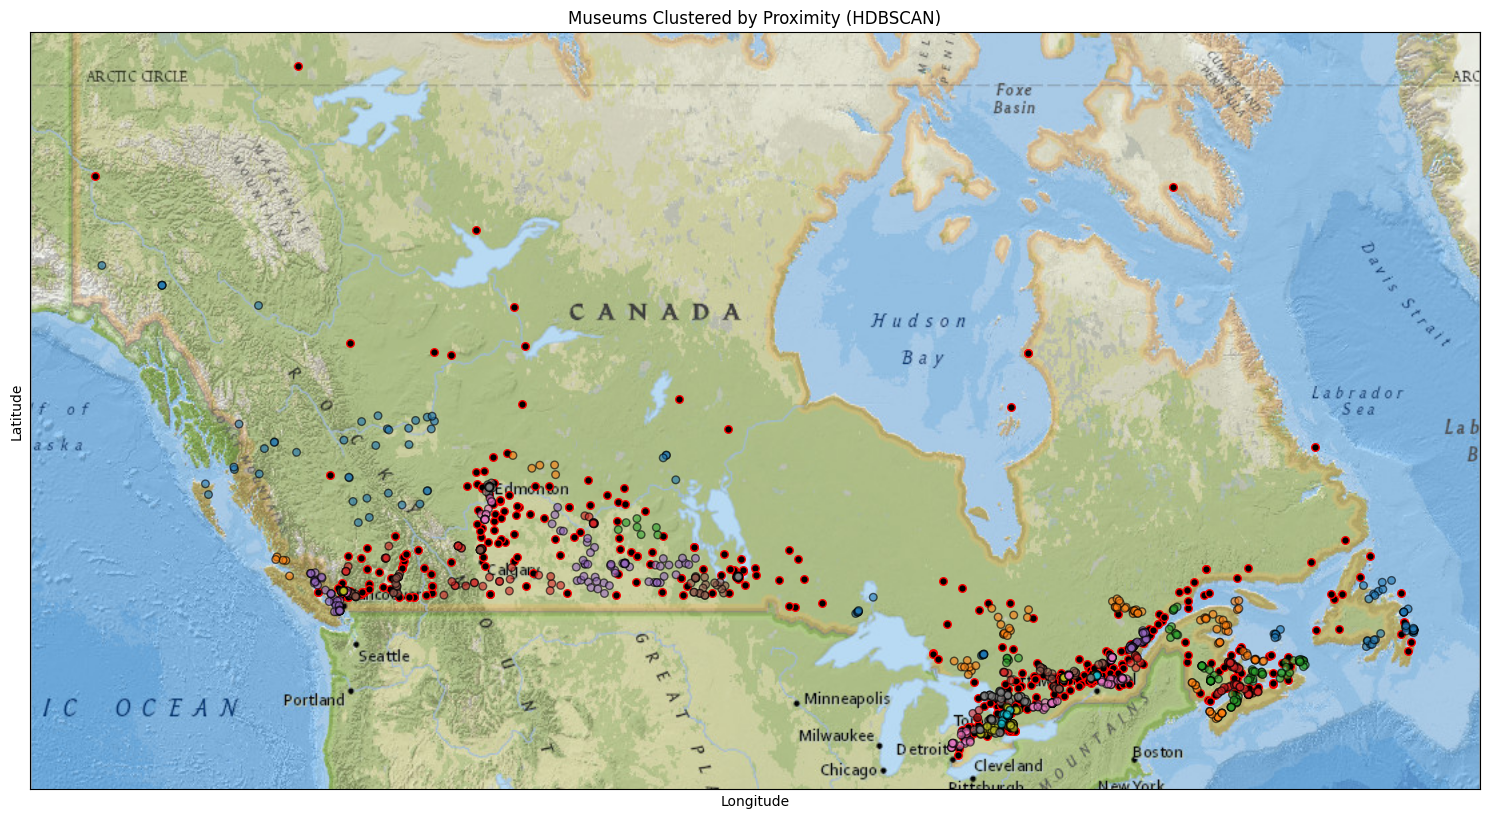

In [41]:
plot_clustered_locations(data, title='Museums Clustered by Proximity (HDBSCAN)', colName='Cluster_HDB')